In [4]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

from causalnex.structure.notears import from_pandas
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
sys.path.append(os.path.abspath(os.path.join('../scripts')))


In [2]:
from ml import Ml
from clean_data import CleanData
from preprocess import Preprocess
from plot import Plot
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('../data/16_features.csv', index_col=[0])

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.703140,0.731113,0.273811,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462
1,1,0.643144,0.272574,0.615783,0.501591,0.203608,0.348757,0.125660,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590
2,1,0.601496,0.390260,0.595743,0.449417,0.462512,0.635686,0.162922,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706
3,1,0.210090,0.360839,0.233501,0.102906,0.565604,0.522863,0.038155,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000
4,1,0.629893,0.156578,0.630986,0.489290,0.463918,0.518390,0.163688,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500


# splitting data

In [7]:
from sklearn.model_selection import train_test_split
split = int(len(df) * 0.9)
train = df[:split]
test = df[split:]

# Create a causal graph using all training data 

In [8]:
sm = from_pandas(train)

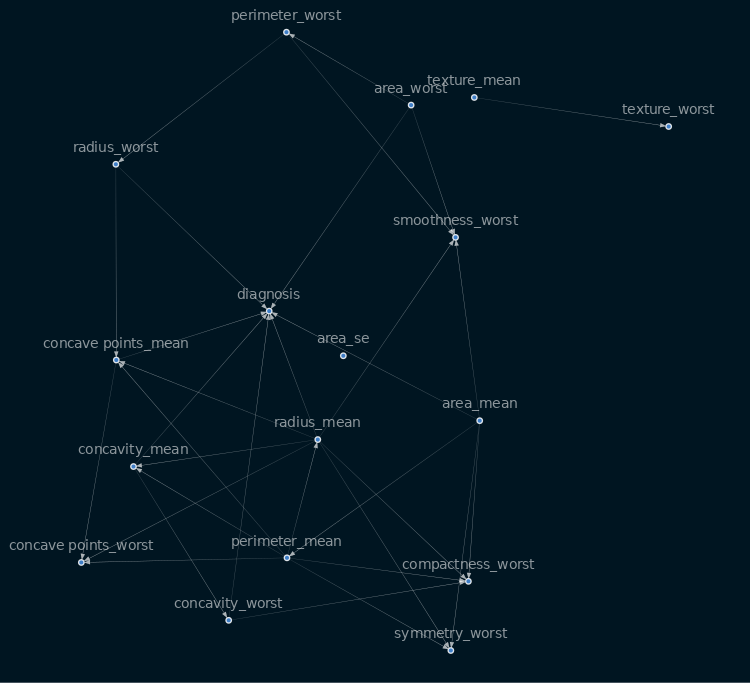

In [9]:
sm = from_pandas(train, tabu_parent_nodes=['diagnosis'])
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "../assets/structure_model.png"
viz.draw(filename)
Image(filename)

- the above graph will be the groud truth to compare with others

## 60%

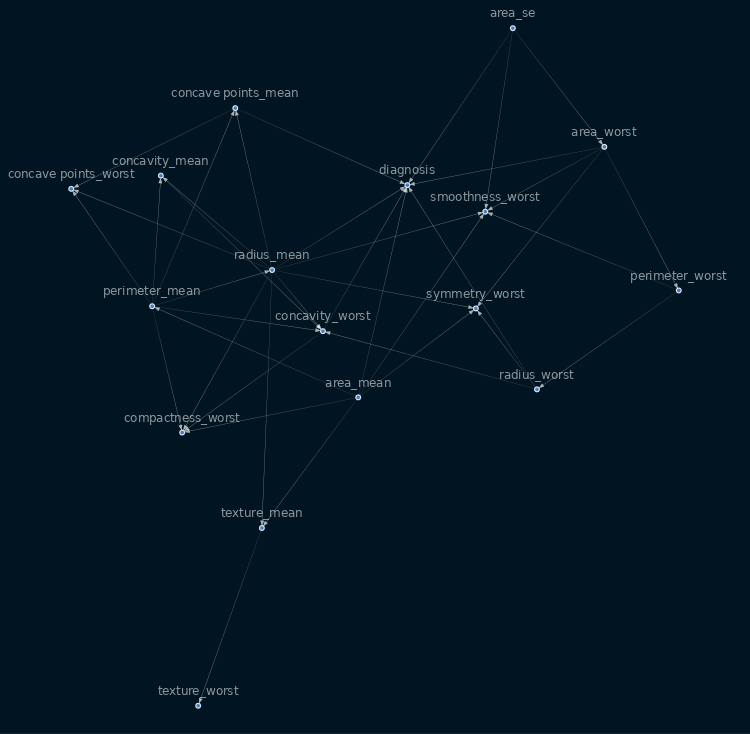

In [10]:
x_frac = train.sample(frac=0.6)
sm1 = from_pandas(x_frac, tabu_parent_nodes=['diagnosis'])
sm1.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm1,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "../assets/structure_model_new.png"
viz.draw(filename)
Image(filename)

## 70%

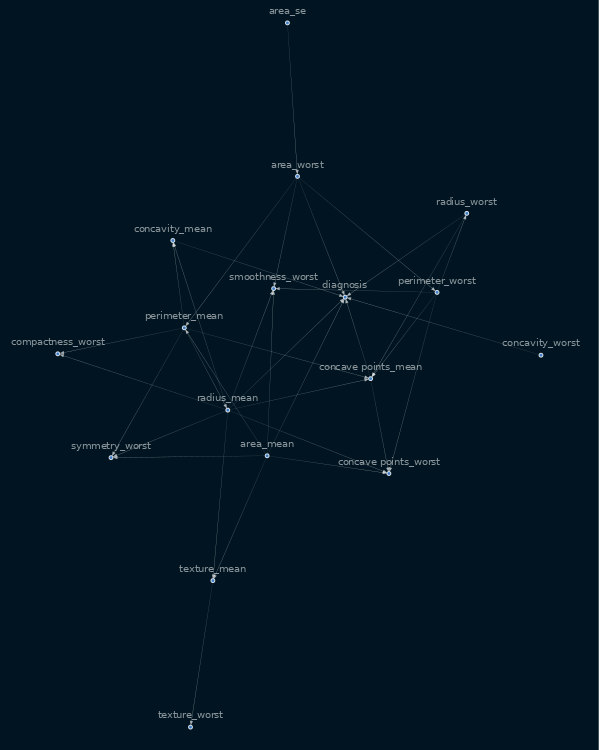

In [11]:
x_frac = train.sample(frac=0.7)
sm2 = from_pandas(x_frac, tabu_parent_nodes=['diagnosis'])
sm2.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "../assets/structure_model_new2.png"
viz.draw(filename)
Image(filename)

## 80%

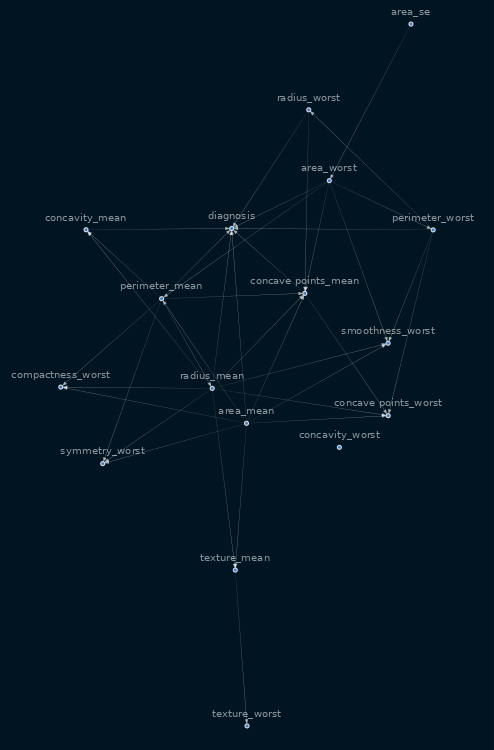

In [12]:
x_frac = train.sample(frac=0.8)
sm3 = from_pandas(x_frac, tabu_parent_nodes=['diagnosis'])
sm3.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm3,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "../assets/structure_model_new3.png"
viz.draw(filename)
Image(filename)

## 90%

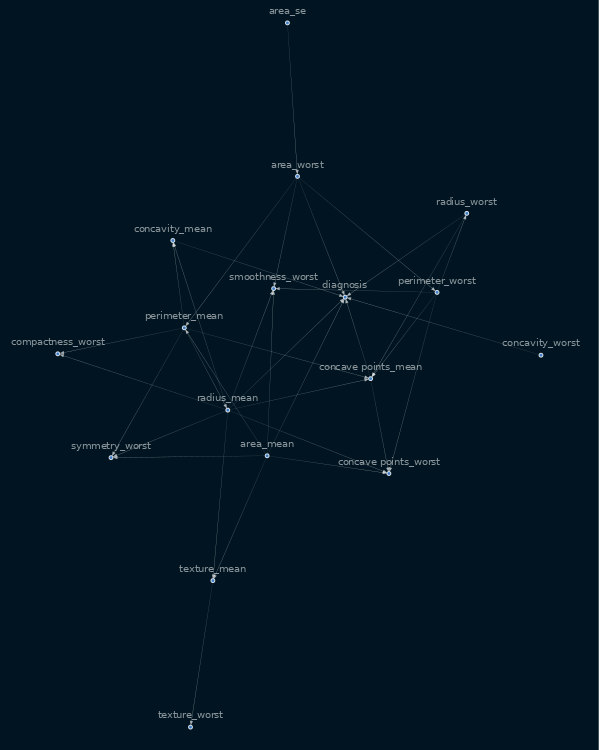

In [13]:
x_frac = train.sample(frac=0.9)
sm4 = from_pandas(x_frac, tabu_parent_nodes=['diagnosis'])
sm4.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm2,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "../assets/structure_model_new4.png"
viz.draw(filename)
Image(filename)

# calculating Jaccard Similarity Index

In [14]:
def jaccard_similarity(A, B):
    i = set(A).intersection(B)
    similarity = round(len(i)/(len(A)+len(B)-len(i)), 3)
    
    return similarity

In [15]:
similarity = jaccard_similarity(sm.edges, sm1.edges)
similarity2 = jaccard_similarity(sm.edges, sm2.edges)
similarity3 = jaccard_similarity(sm.edges, sm3.edges)
similarity4 = jaccard_similarity(sm.edges, sm4.edges)
print(similarity, similarity2, similarity3, similarity4)

0.69 0.718 0.667 0.667


# select only variables that point directly to the target variable

In [16]:
l = list(sm.edges)
l

[('radius_mean', 'diagnosis'),
 ('radius_mean', 'concavity_mean'),
 ('radius_mean', 'concave points_mean'),
 ('radius_mean', 'smoothness_worst'),
 ('radius_mean', 'compactness_worst'),
 ('radius_mean', 'concave points_worst'),
 ('radius_mean', 'symmetry_worst'),
 ('texture_mean', 'texture_worst'),
 ('perimeter_mean', 'radius_mean'),
 ('perimeter_mean', 'concavity_mean'),
 ('perimeter_mean', 'concave points_mean'),
 ('perimeter_mean', 'compactness_worst'),
 ('perimeter_mean', 'concave points_worst'),
 ('perimeter_mean', 'symmetry_worst'),
 ('area_mean', 'diagnosis'),
 ('area_mean', 'perimeter_mean'),
 ('area_mean', 'smoothness_worst'),
 ('area_mean', 'compactness_worst'),
 ('area_mean', 'symmetry_worst'),
 ('concavity_mean', 'diagnosis'),
 ('concavity_mean', 'concavity_worst'),
 ('concave points_mean', 'diagnosis'),
 ('concave points_mean', 'concave points_worst'),
 ('radius_worst', 'diagnosis'),
 ('radius_worst', 'concave points_mean'),
 ('perimeter_worst', 'radius_worst'),
 ('perimete

In [63]:
l[35]

('concavity_worst', 'compactness_worst')

In [17]:
new_sm = sm.copy()

In [18]:
for i in range(len(l)):
    if l[i][1] != 'diagnosis':
        new_sm.remove_edge(l[i][0], l[i][1])

In [26]:
l = list(new_sm.edges)
# new_sm.edges[1][0]
l

[('radius_mean', 'diagnosis'),
 ('area_mean', 'diagnosis'),
 ('concavity_mean', 'diagnosis'),
 ('concave points_mean', 'diagnosis'),
 ('radius_worst', 'diagnosis'),
 ('area_worst', 'diagnosis'),
 ('concavity_worst', 'diagnosis')]

In [30]:
col = []
for i in range(len(l)):
    col.append(l[i][0])
col.append(l[1][1])
col

['radius_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_worst',
 'area_worst',
 'concavity_worst',
 'diagnosis']

In [31]:
from sklearn.model_selection import train_test_split
new_df = df[col]
split = int(len(new_df) * 0.9)
train2 = new_df[:split]
test2 = new_df[split:]

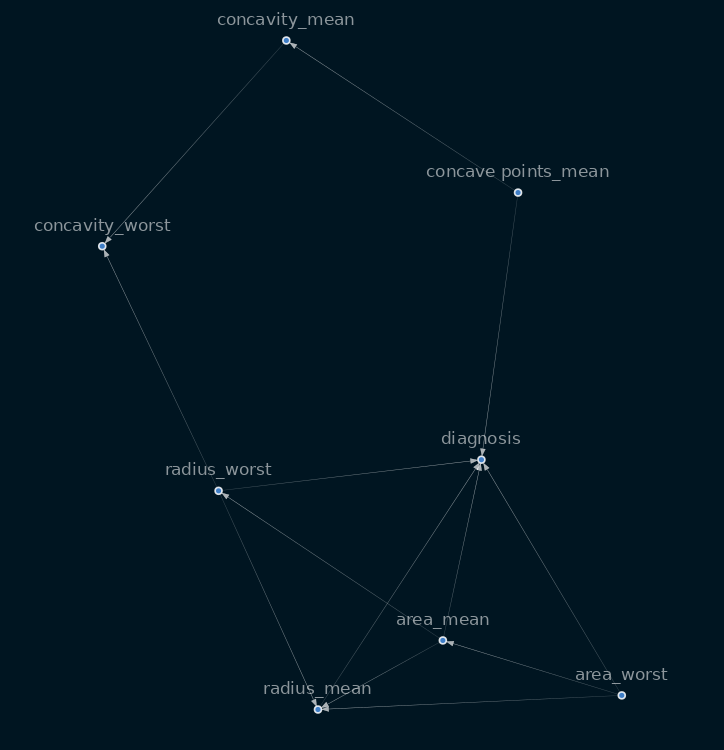

In [33]:
new_sm2 = from_pandas(train2, tabu_parent_nodes=['diagnosis'])
new_sm2.remove_edges_below_threshold(0.8)
viz = plot_structure(
    new_sm2,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "../assets/new_structure_model.png"
viz.draw(filename)
Image(filename)

### train from the new causal graph and with all the varibles 

In [71]:
from causalnex.discretiser.discretiser_strategy import DecisionTreeSupervisedDiscretiserMethod

features = list(df.columns.difference(['diagnosis']))
tree_discretiser = DecisionTreeSupervisedDiscretiserMethod(
    mode="single", 
    tree_params={"max_depth": 2, "random_state": 2021},
)
tree_discretiser.fit(
    feat_names=features, 
    dataframe=df, 
    target_continuous=True,
    target='diagnosis',
)

DecisionTreeSupervisedDiscretiserMethod(tree_params={'max_depth': 2,
                                                     'random_state': 2021})

In [73]:
for col in features:
    df[col] = tree_discretiser.transform(df[[col]])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1,3,0,3,3,3,3,3,3,0,3,3,3,3,3,3,3
1,1,3,1,3,3,1,2,3,3,1,3,3,1,1,1,3,0
2,1,3,2,3,3,3,3,3,3,2,3,3,2,3,3,3,3
3,1,0,2,0,0,3,3,1,0,2,0,0,3,3,3,3,3
4,1,3,0,3,3,3,3,3,3,0,3,3,2,1,3,3,0


In [74]:
from sklearn.model_selection import train_test_split
split = int(len(df) * 0.9)
train = df[:split]
test = df[split:]

In [76]:
from causalnex.network import BayesianNetwork

bn = BayesianNetwork(sm)
bn = bn.fit_node_states(df)

In [77]:
bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [78]:
bn.cpds["diagnosis"]


area_mean                   0                                               \
area_worst                  0                                                
concave points_mean         0                                                
concavity_mean              0                                                
concavity_worst             0                                                
radius_mean                 0                   1                   2        
radius_worst                0    1    2    3    0    1    2    3    0    1   
diagnosis                                                                    
0                    0.990385  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   
1                    0.009615  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5   

area_mean            ...    3                                               \
area_worst           ...    3                                                
concave points_mean  ...    3                                                
concavity_mean       ...    3                                                
concavity_worst      ...    3                                                
radius_mean          ...    1         2                        3             
radius_worst         ...    2    3    0    1    2         3    0    1    2   
diagnosis            ...                                                     
0                    ...  0.5  0.5  0.5  0.5  0.5  0.333333  0.5  0.5  0.5   
1                    ...  0.5  0.5  0.5  0.5  0.5  0.666667  0.5  0.5  0.5   

area_mean                      
area_worst                     
concave points_mean            
concavity_mean                 
concavity_worst                
radius_mean                    
radius_worst                3  
diagnosis                      
0                    0.018182  
1                    0.981818  

[2 rows x 16384 columns]

In [79]:
from causalnex.evaluation import classification_report
classification_report(bn, test, "diagnosis")

{'diagnosis_0': {'precision': 0.8818897637795275,
  'recall': 0.9491525423728814,
  'f1-score': 0.9142857142857144,
  'support': 118},
 'diagnosis_1': {'precision': 0.8636363636363636,
  'recall': 0.7169811320754716,
  'f1-score': 0.7835051546391751,
  'support': 53},
 'accuracy': 0.8771929824561403,
 'macro avg': {'precision': 0.8727630637079455,
  'recall': 0.8330668372241765,
  'f1-score': 0.8488954344624448,
  'support': 171},
 'weighted avg': {'precision': 0.8762322771854475,
  'recall': 0.8771929824561403,
  'f1-score': 0.8737513887812316,
  'support': 171}}

### traning on the features with a direct edge to diagnosis

In [80]:
new_df = df[['diagnosis','radius_mean','area_mean','concavity_mean','concave points_mean', 'radius_worst','area_worst','concavity_worst']]


In [81]:
train, test = train_test_split(new_df, train_size=0.9)

In [82]:
from causalnex.network import BayesianNetwork

bn = BayesianNetwork(new_sm)
bn = bn.fit_node_states(new_df)

ValueError: The given structure has 10 separated graph components. Please make sure it has only one.

In [ ]:
bn = bn.fit_cpds(train, method="BayesianEstimator", bayes_prior="K2")

In [ ]:
bn.cpds["diagnosis"]

In [ ]:
from causalnex.evaluation import classification_report
classification_report(bn, test, "diagnosis")

Accuracy is:  0.9416666666666667


<AxesSubplot:>

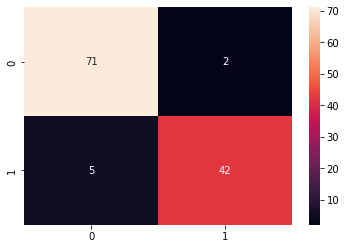

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

y = train['diagnosis']
X = train.drop('diagnosis', axis = 1)

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9333333333333333


<AxesSubplot:>

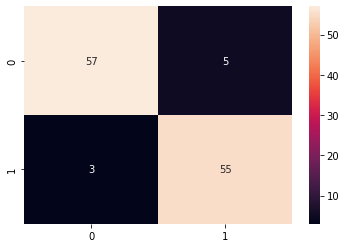

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

y = train['diagnosis']
X = train[['radius_mean','area_mean','concavity_mean','concave points_mean', 'radius_worst','area_worst','concavity_worst']]

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3 )

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

- we have maintained a pretty similar accuracy for the graph a